<a href="https://colab.research.google.com/github/Jayakrishna2005/CSA4705deeplearning/blob/main/deep_learning_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


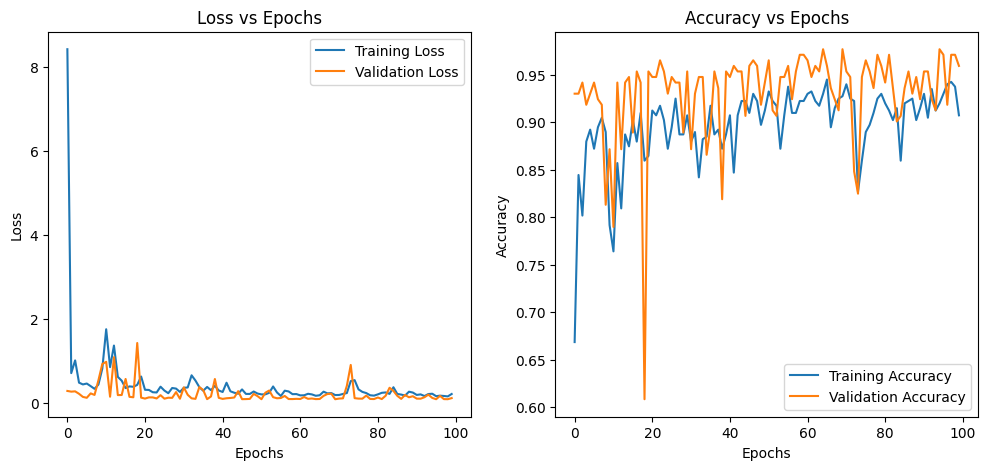


Training Accuracy: 93.97%
Testing Accuracy:  95.91%

✅ Model is well generalized (no significant overfitting).


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from tensorflow import keras
from tensorflow.keras import layers

# Step 2: Load numerical dataset
data = load_breast_cancer()
X = data.data          # Features
y = data.target        # Labels (0 or 1)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Define a neural network model (intentionally large to show overfitting)
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model and record training history
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=0
)

# Step 7: Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Step 8: Evaluate model performance
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")

# Step 9: Conclusion
if train_acc - test_acc > 0.1:
    print("\n✅ Overfitting Detected: Training accuracy much higher than testing accuracy.")
else:
    print("\n✅ Model is well generalized (no significant overfitting).")


#1 experiment


===== BI-LEVEL (BINARY CLASSIFICATION) =====


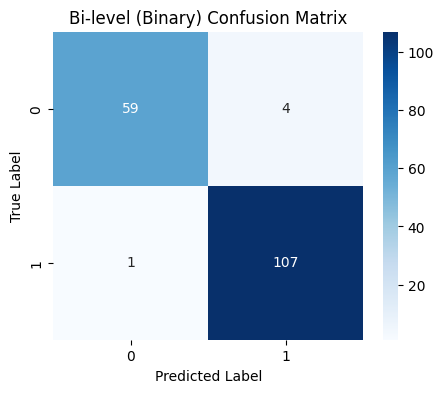

Classification Report (Binary):
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


===== MULTI-LEVEL (MULTI-CLASS CLASSIFICATION) =====


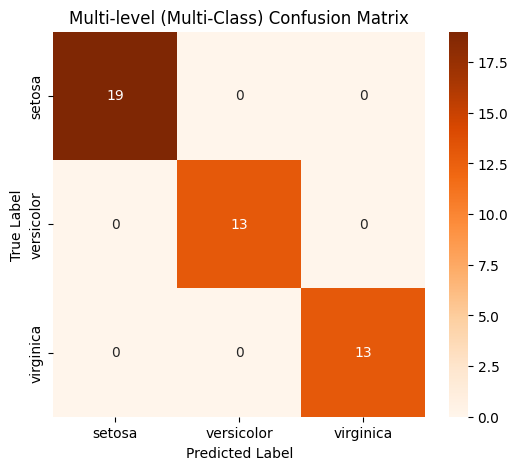

Classification Report (Multi-Class):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.ensemble import RandomForestClassifier

print("===== BI-LEVEL (BINARY CLASSIFICATION) =====")

# Load binary dataset (Breast Cancer)
data_bin = load_breast_cancer()
Xb, yb = data_bin.data, data_bin.target

# Split into train/test sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Train a simple classifier
clf_bin = RandomForestClassifier(random_state=42)
clf_bin.fit(Xb_train, yb_train)

# Predict on test data
yb_pred = clf_bin.predict(Xb_test)

# Construct confusion matrix
cm_bin = confusion_matrix(yb_test, yb_pred)

# Display matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues')
plt.title("Bi-level (Binary) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display classification metrics
print("Classification Report (Binary):")
print(classification_report(yb_test, yb_pred, target_names=data_bin.target_names))


print("\n===== MULTI-LEVEL (MULTI-CLASS CLASSIFICATION) =====")

# Load multi-class dataset (Iris)
data_multi = load_iris()
Xm, ym = data_multi.data, data_multi.target

# Split dataset
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=42)

# Train classifier
clf_multi = RandomForestClassifier(random_state=42)
clf_multi.fit(Xm_train, ym_train)

# Predict
ym_pred = clf_multi.predict(Xm_test)

# Construct confusion matrix
cm_multi = confusion_matrix(ym_test, ym_pred)

# Display matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Oranges',
            xticklabels=data_multi.target_names,
            yticklabels=data_multi.target_names)
plt.title("Multi-level (Multi-Class) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display classification report
print("Classification Report (Multi-Class):")
print(classification_report(ym_test, ym_pred, target_names=data_multi.target_names))


# 3 experiment


===== LINEAR REGRESSION PERFORMANCE ANALYSIS =====
Mean Squared Error (MSE): 0.556
Root Mean Squared Error (RMSE): 0.746
R² Score: 0.576


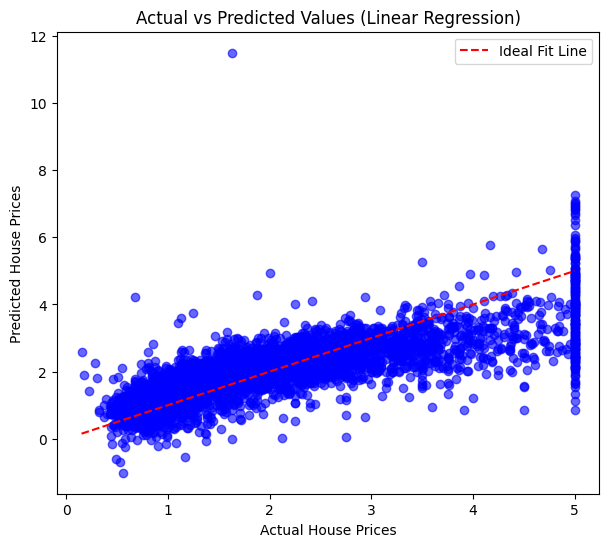

In [5]:

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load numerical dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict values on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== LINEAR REGRESSION PERFORMANCE ANALYSIS =====")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Step 7: Plot actual vs predicted values
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         color='red', linestyle='--', label="Ideal Fit Line")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.legend()
plt.show()


# 4 experiment


Feature Matrix Shape: (569, 30)
Target Vector Shape: (569,)

===== LOGISTIC REGRESSION PERFORMANCE ANALYSIS =====
Accuracy:  0.982
Precision: 0.991
Recall:    0.981
F1 Score:  0.986


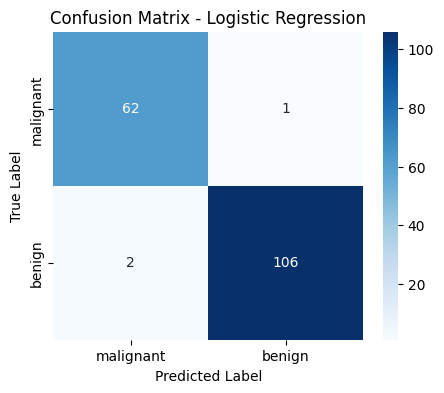


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



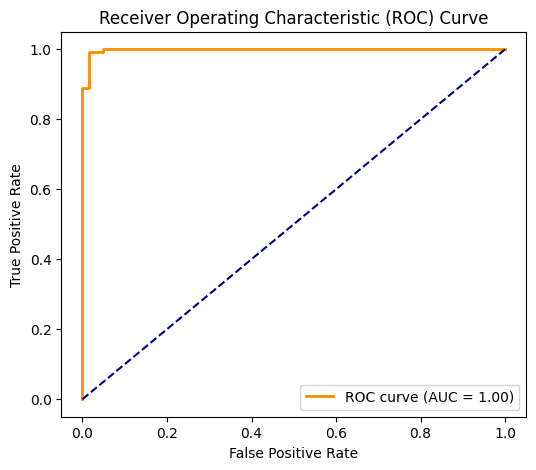

In [6]:
# ------------------------------------------------------------
# ANALYZING PERFORMANCE OF LOGISTIC REGRESSION USING PYTHON
# Dataset: Breast Cancer (Numerical Data)
# ------------------------------------------------------------

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Step 2: Load the Numerical Dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC curve

# Step 7: Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== LOGISTIC REGRESSION PERFORMANCE ANALYSIS =====")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 9: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Step 10: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


# 5 experiement


Epoch    0: m = 0.2077, c = 0.0309, Cost = 507.7949
Epoch  100: m = 3.7604, c = 0.5475, Cost = 7.4650
Epoch  200: m = 3.7749, c = 0.5352, Cost = 7.4564
Epoch  300: m = 3.7769, c = 0.5217, Cost = 7.4541
Epoch  400: m = 3.7789, c = 0.5087, Cost = 7.4519
Epoch  500: m = 3.7807, c = 0.4963, Cost = 7.4499
Epoch  600: m = 3.7825, c = 0.4843, Cost = 7.4481
Epoch  700: m = 3.7842, c = 0.4728, Cost = 7.4464
Epoch  800: m = 3.7859, c = 0.4618, Cost = 7.4449
Epoch  900: m = 3.7875, c = 0.4511, Cost = 7.4434

Final parameters:
m (slope): 3.7890
c (intercept): 0.4411


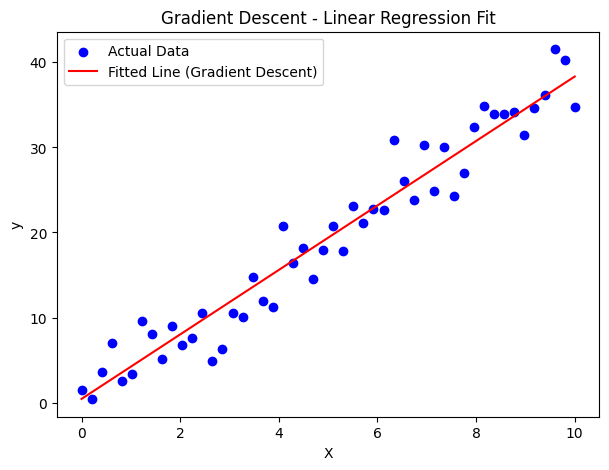

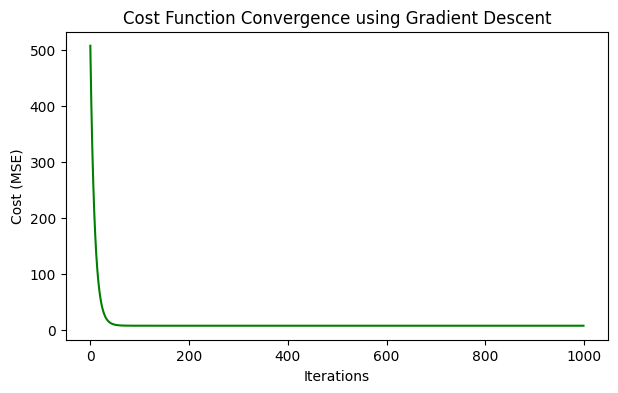

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple linear dataset (y = 4x + noise)
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 4 * X + np.random.randn(50) * 3

# Step 2: Initialize parameters
m = 0  # initial slope
c = 0  # initial intercept
L = 0.0008  # learning rate
epochs = 1000  # number of iterations
n = float(len(X))  # number of data points

# Step 3: Store history for visualization
cost_history = []

# Step 4: Gradient Descent Algorithm
for i in range(epochs):
    y_pred = m * X + c
    cost = (1/n) * sum((y - y_pred) ** 2)
    cost_history.append(cost)

    # Calculate gradients
    D_m = (-2/n) * sum(X * (y - y_pred))
    D_c = (-2/n) * sum(y - y_pred)

    # Update parameters
    m = m - L * D_m
    c = c - L * D_c

    # Print progress every 100 epochs
    if i % 100 == 0:
        print(f"Epoch {i:4d}: m = {m:.4f}, c = {c:.4f}, Cost = {cost:.4f}")

# Step 5: Final parameters
print("\nFinal parameters:")
print(f"m (slope): {m:.4f}")
print(f"c (intercept): {c:.4f}")

# Step 6: Plot the regression line
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, m*X + c, color='red', label="Fitted Line (Gradient Descent)")
plt.title("Gradient Descent - Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 7: Plot cost function convergence
plt.figure(figsize=(7, 4))
plt.plot(range(epochs), cost_history, color='green')
plt.title("Cost Function Convergence using Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()
